In [58]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
df = pd.read_csv("leaderboards_7308448.csv")

In [60]:
df.head()

,athlete_name,rank,athlete_gender,start_date_local,distance,average_watts,moving_time,elapsed_time,average_hr
0,The Todd,1,M,2015-03-29T15:24:15Z,489.1,NaN,20,20,NaN
1,Steve G,2,M,2011-10-11T18:35:58Z,449.4,521.0,33,33,185.5
2,Peter Cracknell,2,M,2012-05-06T13:39:11Z,491.8,572.2,33,33,NaN
3,Thomas De Gendt,2,M,2013-05-18T23:35:53Z,492.2,471.7,33,33,166.0
4,Jason Lokkesmoe,2,M,2013-08-26T17:11:58Z,426.9,508.1,33,33,NaN


In [61]:
df.sort(["distance"], ascending=[0]).head()

,athlete_name,rank,athlete_gender,start_date_local,distance,average_watts,moving_time,elapsed_time,average_hr
22852,Alicia Guzman,22875,F,2014-05-13T15:58:57Z,772.3,155.2,116,1187,NaN
19927,Mark Campbell,19878,M,2014-03-24T13:03:56Z,718.3,119.9,76,76,NaN
22834,Jessica Sanders,22857,F,2013-06-10T14:29:22Z,710.8,NaN,275,335,NaN
4532,Joe Blum,3928,M,2014-06-02T15:21:29Z,700.1,137.6,51,51,NaN
14554,Curtis Bisaillon,14503,M,2014-03-16T11:30:58Z,691.0,216.7,64,64,NaN


In [62]:
df[["distance", "moving_time"]].describe()

,distance,moving_time
count,22853.000000,22853.000000
mean,487.918050,62.172100
std,20.064151,14.777227
min,0.000000,0.000000
25%,483.500000,53.000000
50%,490.400000,60.000000
75%,496.500000,68.000000
max,772.300000,352.000000


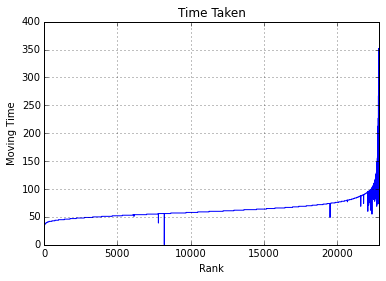

In [63]:
plt.figure();
ax = df['moving_time'].plot(title="Time Taken")
ax.set_xlabel("Rank")
ax.set_ylabel("Moving Time")

In [96]:
df["speed"] = (df["distance"] / (1609.344 * df["moving_time"])) * 3600
df["speed"].describe()

count    22852.000000
mean        18.289043
std          3.410893
min          2.282692
25%         16.177365
50%         18.324690
75%         20.440161
max         54.704277
Name: speed, dtype: float64

In [65]:
df[0:10]

,athlete_name,rank,athlete_gender,start_date_local,distance,average_watts,moving_time,elapsed_time,average_hr,speed
0,The Todd,1,M,2015-03-29T15:24:15Z,489.1,NaN,20,20,NaN,54.704277
1,Steve G,2,M,2011-10-11T18:35:58Z,449.4,521.0,33,33,185.5,30.463005
2,Peter Cracknell,2,M,2012-05-06T13:39:11Z,491.8,572.2,33,33,NaN,33.337129
3,Thomas De Gendt,2,M,2013-05-18T23:35:53Z,492.2,471.7,33,33,166.0,33.364244
4,Jason Lokkesmoe,2,M,2013-08-26T17:11:58Z,426.9,508.1,33,33,NaN,28.937821
5,Scott Harrington,6,M,2009-11-26T22:31:48Z,399.2,NaN,34,34,NaN,26.264264
6,Bruce Prescott,6,M,2011-02-21T10:07:51Z,417.6,300.8,34,34,NaN,27.474841
7,Ben Jacques-Maynes,6,M,2013-05-19T08:35:55Z,461.7,502.2,34,34,NaN,30.376279
8,James Stemper,6,M,2013-05-19T08:35:54Z,480.2,554.1,34,34,NaN,31.593436
9,Fred Haise,6,M,2013-05-19T08:35:59Z,462.4,548.0,34,34,NaN,30.422334


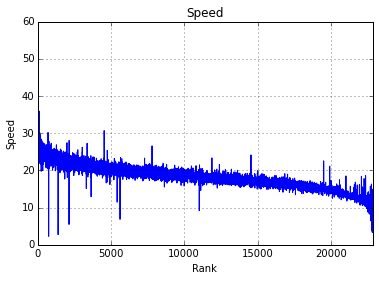

In [66]:
ax = df['speed'].plot(title="Speed")
ax.set_xlabel("Rank")
ax.set_ylabel("Speed")

In [67]:
df["male"] = np.where(df['athlete_gender']=='M', 1, 0)
df[0:10]

,athlete_name,rank,athlete_gender,start_date_local,distance,average_watts,moving_time,elapsed_time,average_hr,speed,male
0,The Todd,1,M,2015-03-29T15:24:15Z,489.1,NaN,20,20,NaN,54.704277,1
1,Steve G,2,M,2011-10-11T18:35:58Z,449.4,521.0,33,33,185.5,30.463005,1
2,Peter Cracknell,2,M,2012-05-06T13:39:11Z,491.8,572.2,33,33,NaN,33.337129,1
3,Thomas De Gendt,2,M,2013-05-18T23:35:53Z,492.2,471.7,33,33,166.0,33.364244,1
4,Jason Lokkesmoe,2,M,2013-08-26T17:11:58Z,426.9,508.1,33,33,NaN,28.937821,1
5,Scott Harrington,6,M,2009-11-26T22:31:48Z,399.2,NaN,34,34,NaN,26.264264,1
6,Bruce Prescott,6,M,2011-02-21T10:07:51Z,417.6,300.8,34,34,NaN,27.474841,1
7,Ben Jacques-Maynes,6,M,2013-05-19T08:35:55Z,461.7,502.2,34,34,NaN,30.376279,1
8,James Stemper,6,M,2013-05-19T08:35:54Z,480.2,554.1,34,34,NaN,31.593436,1
9,Fred Haise,6,M,2013-05-19T08:35:59Z,462.4,548.0,34,34,NaN,30.422334,1


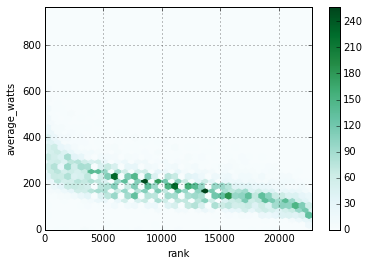

In [68]:
df.plot(kind="hexbin", x="rank", y="average_watts", gridsize=40)

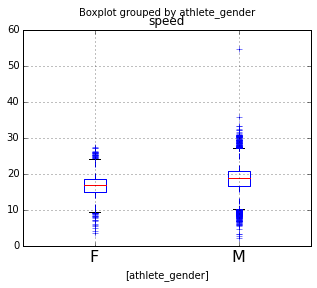

In [69]:
df1 = df[["athlete_gender","speed"]].boxplot(by="athlete_gender", fontsize=16, figsize=(5,4))

In [70]:
df1 = df[["distance", "moving_time"]].values
df1

array([[ 489.1,   20. ],
       [ 449.4,   33. ],
       [ 491.8,   33. ],
       ..., 
       [ 530.6,  130. ],
       [ 517.6,  148. ],
       [ 772.3,  116. ]])

In [71]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

###############################################################################
# Generate sample data
X, _ = make_blobs(n_samples=500, n_features=2, centers=df1, cluster_std=0.6)

###############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("@@@ Number of estimated clusters : %d" % n_clusters_)


@@@ Number of estimated clusters : 6


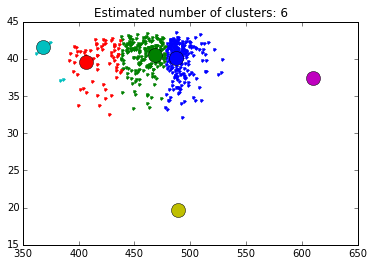

In [72]:
###############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [78]:
import json
with open('segments.json') as f:
    df2 = pd.DataFrame(json.loads(line) for line in f)

In [79]:
df2.head()

,_id,activity_type,athlete_count,athlete_segment_stats,average_grade,city,climb_category,country,created_at,distance,...,private,resource_state,star_count,starred,start_latitude,start_latlng,start_longitude,state,total_elevation_gain,updated_at
0,{u'$oid': u'5520da27fe36ad258b06923b'},Ride,74,"{u'effort_count': 0, u'pr_date': None, u'pr_el...",0.4,None,0,None,2014-05-26T06:32:27Z,2000.000,...,False,3,3,False,33.969531,"[33.969531, -118.256342]",-118.256342,None,8.2,2015-04-04T08:03:09Z
1,{u'$oid': u'5520da28fe36ad258b069286'},Ride,100,"{u'effort_count': 0, u'pr_date': None, u'pr_el...",-0.5,Los Angeles,0,United States,2014-11-09T23:18:50Z,387.700,...,False,3,1,False,33.981649,"[33.981649, -118.256546]",-118.256546,California,0.0,2015-04-02T08:03:56Z
2,{u'$oid': u'5520da2afe36ad258b0692eb'},Ride,83,"{u'effort_count': 0, u'pr_date': None, u'pr_el...",-0.1,None,0,None,2013-03-14T13:31:00Z,642.891,...,False,3,1,False,33.960080,"[33.96008035, -118.24196243]",-118.241962,None,15.3,2015-04-03T08:02:47Z
3,{u'$oid': u'5520da2cfe36ad258b06933f'},Ride,1,"{u'effort_count': 0, u'pr_date': None, u'pr_el...",0.0,Vernon,0,United States,2012-10-04T01:04:03Z,1042.420,...,False,3,1,False,33.987141,"[33.9871405, -118.23570142]",-118.235701,CA,0.0,2015-03-29T08:02:38Z
4,{u'$oid': u'5520da2dfe36ad258b069341'},Ride,79,"{u'effort_count': 0, u'pr_date': None, u'pr_el...",-0.4,Los Angeles,0,United States,2014-11-09T23:33:44Z,772.600,...,False,3,1,False,33.974300,"[33.9743, -118.256505]",-118.256505,California,0.0,2015-04-02T08:03:56Z


In [95]:
df2[["city"]].describe()

,city
count,10923
unique,1818
top,Los Angeles
freq,393
